In [1]:
import PIL
import cv2
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import os
import random

from keras.preprocessing.image import ImageDataGenerator

In [18]:
main_dir = 'D:/Belajar python/Bangkit_capstone/12_classes/garbage_classification'

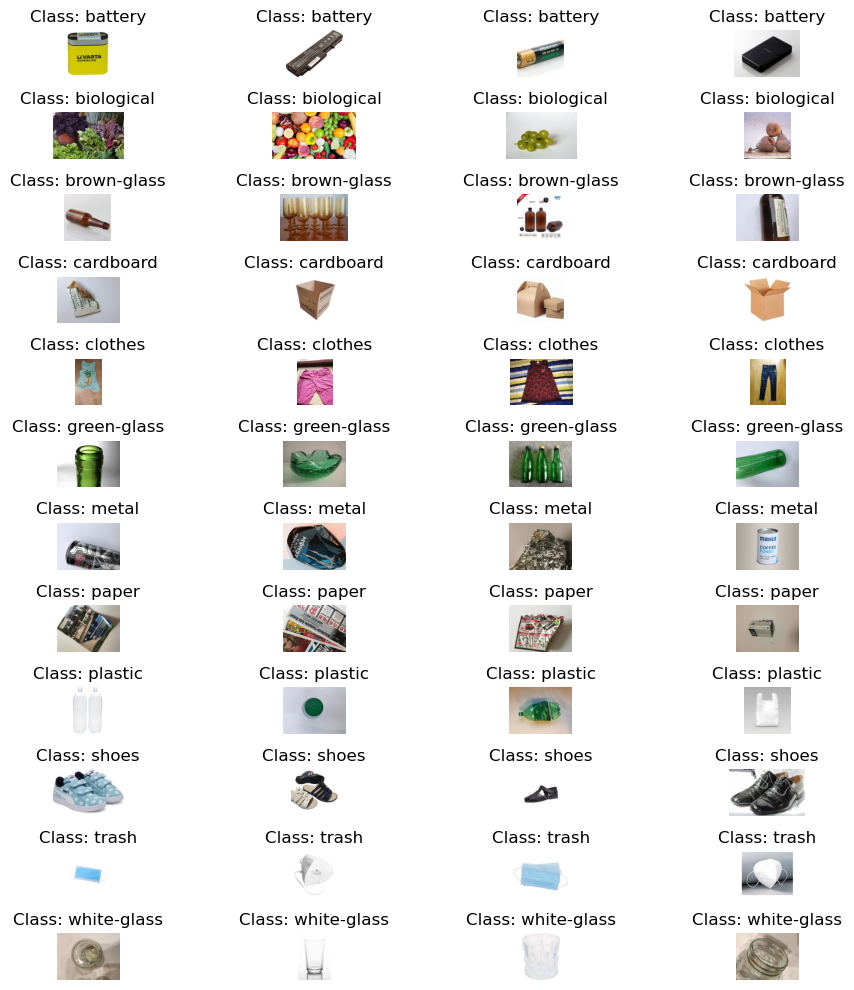

In [5]:
def plot_random_images(directory, n=1):
    classes = os.listdir(directory)
    num_classes = len(classes)

    fig, axs = plt.subplots(num_classes, n, figsize=(10, 10))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            selected_images = random.sample(images, n)

            for j, image_name in enumerate(selected_images):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)

                # OpenCV reads images in BGR format, convert to RGB for Matplotlib
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                axs[i, j].imshow(image_rgb)
                axs[i, j].set_title(f'Class: {class_name}')
                axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()
plot_random_images(main_dir, 4)

In [19]:
# reading the file
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    validation_split=0.15
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = test_datagen.flow_from_directory(
    main_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=False
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 13194 images belonging to 12 classes.
Found 2321 images belonging to 12 classes.
{0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass', 6: 'metal', 7: 'paper', 8: 'plastic', 9: 'shoes', 10: 'trash', 11: 'white-glass'}


In [4]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [11]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 12)                15372     
                                                                 
Total params: 2273356 (8.67 MB)
Trainable params: 15372 (60.05 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=2,
                                                  mode ="max",
                                                  verbose=1,
                                                  min_delta=0.001,
                                                  restore_best_weights=True)

In [13]:
tf.keras.utils.set_random_seed(67)
tf.config.experimental.enable_op_determinism()
history = model.fit(train_generator,
                   epochs=5,
                   validation_data=validation_generator,
                   callbacks=[early_stopping])

Epoch 1/5
207/207 [==============================] - 193s 920ms/step - loss: 0.6022 - accuracy: 0.8229 - val_loss: 0.4021 - val_accuracy: 0.8699
Epoch 2/5
207/207 [==============================] - 188s 910ms/step - loss: 0.2551 - accuracy: 0.9255 - val_loss: 0.3215 - val_accuracy: 0.8962
Epoch 3/5
207/207 [==============================] - 188s 910ms/step - loss: 0.1983 - accuracy: 0.9416 - val_loss: 0.3006 - val_accuracy: 0.9009
Epoch 4/5
207/207 [==============================] - 190s 917ms/step - loss: 0.1670 - accuracy: 0.9509 - val_loss: 0.2910 - val_accuracy: 0.9018
Epoch 5/5
207/207 [==============================] - 189s 914ms/step - loss: 0.1447 - accuracy: 0.9574 - val_loss: 0.2782 - val_accuracy: 0.9104


In [14]:
model.save('mobilenetv2_5epochs.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
model = tf.keras.models.load_model('mobilenetv2_5epochs.h5')

1/1 [==============================] - 0s 82ms/step
0
battery


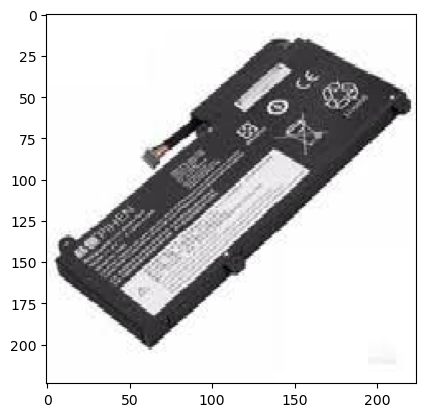

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


# predicting images
path = 'D:/Belajar python/Bangkit_capstone/12_classes/garbage_classification/battery/battery10.jpg'
img = image.load_img(path, target_size=(224,224))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = x/255.0

labels = {0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass', 6: 'metal', 7: 'paper', 8: 'plastic', 9: 'shoes', 10: 'trash', 11: 'white-glass'}
classes = np.argmax(model.predict(images))

print(classes)
print(labels[classes])

In [21]:
test_predictions = np.argmax(model.predict(validation_generator), axis=-1)

37/37 [==============================] - 80s 2s/step


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(validation_generator.classes, test_predictions))

[[124   0   0   2   0   1  11   2   0   1   0   0]
 [  0 136   3   0   2   1   1   1   0   2   1   0]
 [  0   0  85   0   0   0   3   0   0   1   0   2]
 [  0   0   0 114   5   0   1  11   0   0   0   2]
 [  0   0   0   0 791   0   0   1   0   6   0   0]
 [  1   6   6   0   0  75   1   1   2   0   0   2]
 [  1   0   0   0   3   0  93   3   7   0   0   8]
 [  0   0   0   5   3   0   1 144   1   2   0   1]
 [  0   2   1   0   0   5  10   0  97   0   1  13]
 [  0   0   0   0   4   0   1   0   0 290   1   0]
 [  0   1   0   0   0   0   0   5   4   1  91   2]
 [  0   0   4   0   0   1   8   1  26   1   1  74]]


In [53]:
from sklearn.metrics import classification_report

print(classification_report(validation_generator.classes, test_predictions, target_names=labels.values()))

              precision    recall  f1-score   support

     battery       0.98      0.88      0.93       141
  biological       0.94      0.93      0.93       147
 brown-glass       0.86      0.93      0.89        91
   cardboard       0.94      0.86      0.90       133
     clothes       0.98      0.99      0.99       798
 green-glass       0.90      0.80      0.85        94
       metal       0.72      0.81      0.76       115
       paper       0.85      0.92      0.88       157
     plastic       0.71      0.75      0.73       129
       shoes       0.95      0.98      0.97       296
       trash       0.96      0.88      0.91       104
 white-glass       0.71      0.64      0.67       116

    accuracy                           0.91      2321
   macro avg       0.88      0.86      0.87      2321
weighted avg       0.91      0.91      0.91      2321

